### 1. 线性回归的从零开始实现
- 本节将介绍如何只利用Tensor和GradientTape来实现一个线性回归的训练。
- 首先，导入本节中实验所需的包或模块，其中的matplotlib包可用于作图，且设置成嵌入显示。

In [2]:
%matplotlib inline
import tensorflow as tf
print(tf.__version__)
from matplotlib import pyplot as plt
import random

2.3.0


### 2. 生成数据集
- 我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实的模型参数的区别。
- 设训练数据集样本数为1000, 样本的输入特征数为2 
- 给定的随机批量样本特征 $X $
- 注意 : Y += X (Y = Y + X)是减少内存开销的写法, 详见: [2.2.5 运算的内存开销](https://trickygo.github.io/Dive-into-DL-TensorFlow2.0/#/chapter02_prerequisite/2.2_tensor)

In [7]:
# 特征维度
w_input = 2
# 特征数量
w_examples = 1000
# 权重值
true_w = [2,-3.4]
# 偏差值
true_b = 4.2

# 生成特征值, 特征值为维度(1000,2)的标准差为1正太分布的随机数
features =tf.random.normal((w_examples,w_input), stddev=1)
# 生成标签
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
# 下面的写法是为了减少内存开销的写法
labels += tf.random.normal(labels.shape, stddev=0.01)

tf.Tensor(4.1187863, shape=(), dtype=float32)
tf.Tensor(4.125721, shape=(), dtype=float32)


- 注意，`features` 的每一行是一个长度为2的向量，而 `labels` 的每一行是一个长度为1的向量（标量）

In [9]:
features[0],labels[0]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.32468262, -0.16710342], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.125721>)

- 通过生成第二个特征features[:, 1]和标签 labels 的散点图，可以更直观地观察两者间的线性关系。

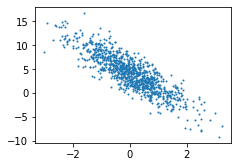

In [12]:
def set_figsize(figsize=(3.5, 2.5)):
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1], labels, 1)

### 3. 读取数据
- 在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数：它每次返回 batch_size（批量大小）个随机样本的特征和标签。